In [1]:
import pandas as pd
import numpy as np


In [2]:
# Seed for reproducibility
np.random.seed(42)

# Define categories
user_ids = np.arange(1, 10001)  # 10,000 users

age_groups = {
    'Toddler': np.random.randint(1, 5, 150),
    'Child': np.random.randint(5, 12, 300),
    'Pre-Teen': np.random.randint(13, 15, 250),
    'Teenager': np.random.randint(16, 19, 250),
    'Young Adult': np.random.randint(20, 30, 1500),
    'Adult': np.random.randint(31, 50, 4500),
    'Senior': np.random.randint(50, 80, 1050)
}

locations = ['USA', 'India', 'UK', 'Canada', 'Australia', 'Germany', 'France', 'Japan', 'Brazil', 'South Korea']

# Expanded interests for each age group
interests_toddler = ['Cartoons', 'Toys', 'Music', 'Pets']
interests_child = ['Cartoons', 'Games', 'Crafts', 'Music', 'Pets', 'Outdoor Activities']
interests_preteen = ['Video Games', 'Music', 'Movies', 'Outdoor Activities', 'Crafts', 'Sports']
interests_teen = ['Social Media', 'Music', 'Movies', 'Gaming', 'Sports', 'Trends', 'Fashion']
interests_young_adult = ['Technology', 'Travel', 'Movies', 'Music', 'Social Media', 'Fitness', 'Cooking', 'Science']
interests_adult = ['Politics', 'Fitness', 'Finance', 'Cooking', 'Science', 'Health & Wellness', 'Business']
interests_senior = ['Travel', 'Gardening', 'News', 'Health & Wellness', 'Cooking', 'Technology', 'Finance']

# Expanded content liked based on age group interests
content_liked_toddler = ['Cartoon Shows', 'Music for Kids', 'Pet Videos', 'Toy Reviews']
content_liked_child = ['Kids Movies', 'Educational Games', 'Pet Videos', 'Craft Tutorials', 'Outdoor Games']
content_liked_preteen = ['TikTok Trends', 'YouTube Vlogs', 'Action Movies', 'Pop Music', 'Craft Tutorials']
content_liked_teen = ['Social Media Challenges', 'Gaming Streams', 'Esports', 'Pop Music', 'Movies']
content_liked_young_adult = ['Fitness Videos', 'Cooking Tutorials', 'Tech Reviews', 'Travel Blogs', 'Science Documentaries']
content_liked_adult = ['News Articles', 'Political Debates', 'Business Talks', 'Health Tips', 'Documentaries', 'Financial Advice']
content_liked_senior = ['Gardening Shows', 'Travel Shows', 'Health Documentaries', 'News Shows', 'Finance Shows']

# Create empty lists to store the generated data
user_data = []

# Generate data for each age group
for age_group, ages in age_groups.items():
    for age in ages:
        if age_group == 'Toddler':
            interest = np.random.choice(interests_toddler)
            content_liked = np.random.choice(content_liked_toddler)
        elif age_group == 'Child':
            interest = np.random.choice(interests_child)
            content_liked = np.random.choice(content_liked_child)
        elif age_group == 'Pre-Teen':
            interest = np.random.choice(interests_preteen)
            content_liked = np.random.choice(content_liked_preteen)
        elif age_group == 'Teenager':
            interest = np.random.choice(interests_teen)
            content_liked = np.random.choice(content_liked_teen)
        elif age_group == 'Young Adult':
            interest = np.random.choice(interests_young_adult)
            content_liked = np.random.choice(content_liked_young_adult)
        elif age_group == 'Adult':
            interest = np.random.choice(interests_adult)
            content_liked = np.random.choice(content_liked_adult)
        elif age_group == 'Senior':
            interest = np.random.choice(interests_senior)
            content_liked = np.random.choice(content_liked_senior)

        location = np.random.choice(locations)

        user_data.append({
            'user_id': np.random.randint(1, 10001),  # Simulate 10k unique users
            'age': age,
            'location': location,
            'content_liked': content_liked,
            'interest': interest
        })

# Create DataFrame from the data
df = pd.DataFrame(user_data)

# Show a preview of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv('expanded_social_media_user_data.csv', index=False)

   user_id  age location   content_liked interest
0     3982    3    India  Music for Kids    Music
1     9097    4       UK  Music for Kids     Toys
2     9127    1       UK      Pet Videos    Music
3     8213    3   France     Toy Reviews     Toys
4     4656    3       UK      Pet Videos     Toys


Training part

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
# Load the dataset
df = pd.read_csv('expanded_social_media_user_data.csv')

In [5]:
# Display first few rows of the dataset
print(df.head())


   user_id  age location   content_liked interest
0     3982    3    India  Music for Kids    Music
1     9097    4       UK  Music for Kids     Toys
2     9127    1       UK      Pet Videos    Music
3     8213    3   France     Toy Reviews     Toys
4     4656    3       UK      Pet Videos     Toys


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Preprocess the data using One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)  # Replace 'sparse' with 'sparse_output'

# Encode 'location', 'content_liked', 'interest' columns
encoded_features = encoder.fit_transform(df[['location', 'content_liked', 'interest']])

# Combine the encoded features with the numerical 'age' column
processed_features = np.hstack((df[['age']].values, encoded_features))


In [9]:
# Function to plot Elbow Method
def plot_elbow_method(processed_features):
    inertia_list = []
    K = range(1, 11)  # Try from 1 to 10 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(processed_features)
        inertia_list.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia_list, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

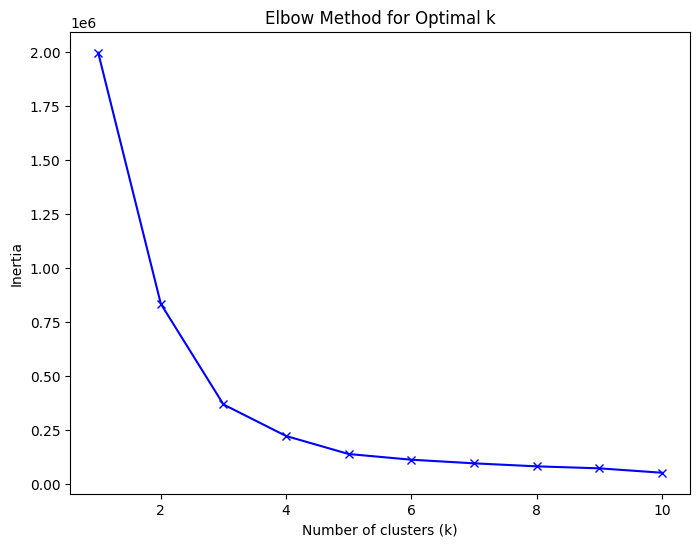

Silhouette Score for 4 clusters: 0.5271397384858842


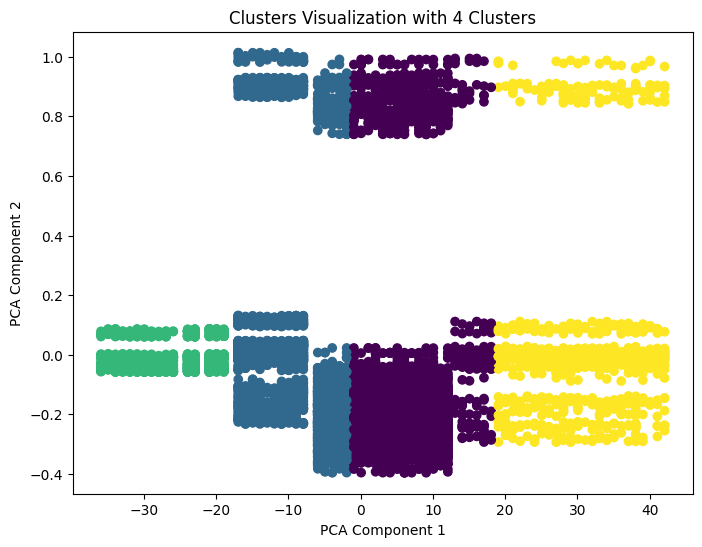

In [10]:
# Function to evaluate model using Silhouette Score and plot clusters
def evaluate_and_visualize_clusters(processed_features, n_clusters):
    # Apply KMeans with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(processed_features)

    # Get the cluster labels
    labels = kmeans.labels_

    # Compute the Silhouette Score
    silhouette_avg = silhouette_score(processed_features, labels)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')

    # Reduce to 2D using PCA for visualization
    pca = PCA(2)
    reduced_data = pca.fit_transform(processed_features)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.title(f'Clusters Visualization with {n_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Step 1: Plot Elbow Method to find optimal number of clusters
plot_elbow_method(processed_features)

# Step 2: Let's assume from Elbow Method that k=4 is optimal
evaluate_and_visualize_clusters(processed_features, n_clusters=4)

   user_id  age location   content_liked interest
0     3982    3    India  Music for Kids    Music
1     9097    4       UK  Music for Kids     Toys
2     9127    1       UK      Pet Videos    Music
3     8213    3   France     Toy Reviews     Toys
4     4656    3       UK      Pet Videos     Toys


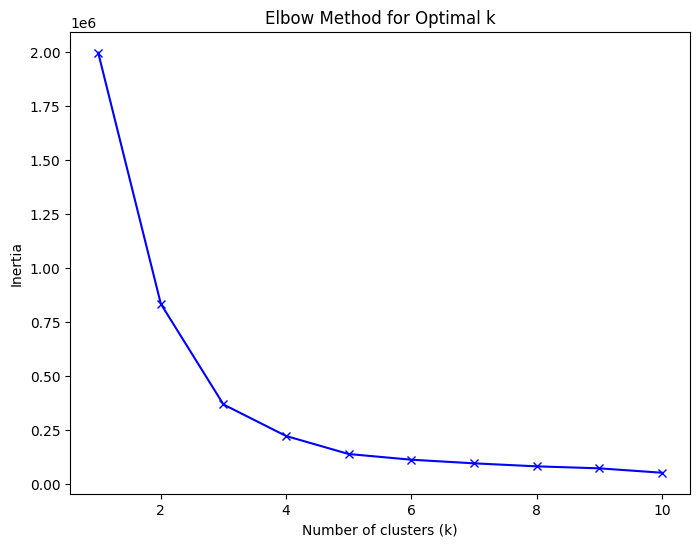

Silhouette Score for 4 clusters: 0.5271397384858842


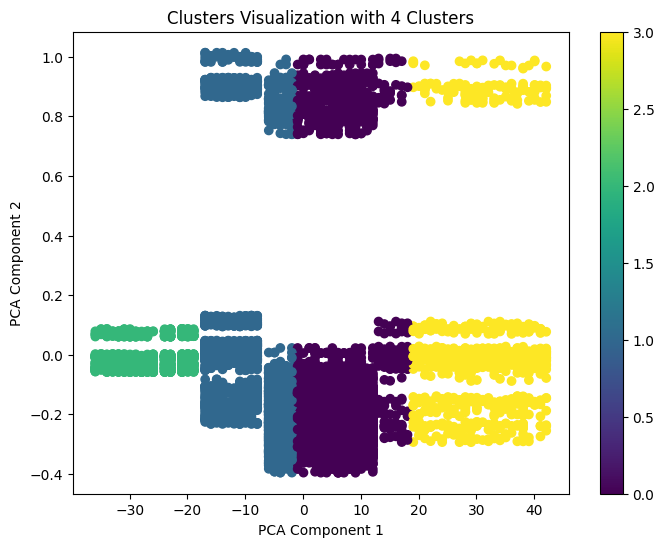

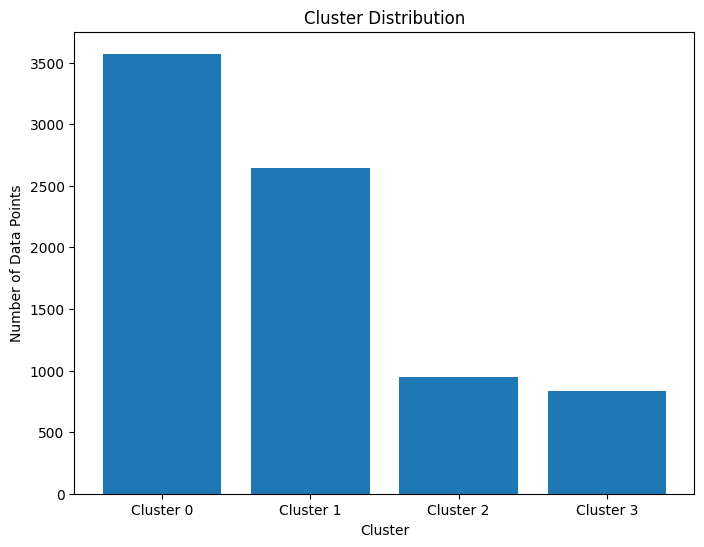

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('expanded_social_media_user_data.csv')

# Step 1: Data Preprocessing - One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)

# Encode 'location', 'content_liked', 'interest' columns
encoded_features = encoder.fit_transform(df[['location', 'content_liked', 'interest']])

# Combine the encoded features with the numerical 'age' column
processed_features = np.hstack((df[['age']].values, encoded_features))

# Step 2: Elbow Method to find optimal number of clusters
def plot_elbow_method(processed_features):
    inertia_list = []
    K = range(1, 11)  # Try from 1 to 10 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(processed_features)
        inertia_list.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia_list, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Step 3: Apply K-Means and Evaluate
def evaluate_and_visualize_clusters(processed_features, n_clusters):
    # Apply KMeans with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(processed_features)

    # Get the cluster labels
    labels = kmeans.labels_

    # Compute the Silhouette Score
    silhouette_avg = silhouette_score(processed_features, labels)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')

    # Reduce to 2D using PCA for visualization
    pca = PCA(2)
    reduced_data = pca.fit_transform(processed_features)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.title(f'Clusters Visualization with {n_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

    return kmeans, labels

# Step 4: Visualizing Cluster Distribution
def plot_cluster_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(8, 6))
    plt.bar(unique, counts, tick_label=[f'Cluster {i}' for i in unique])
    plt.xlabel('Cluster')
    plt.ylabel('Number of Data Points')
    plt.title('Cluster Distribution')
    plt.show()

# Step 1: Display the first few rows of the dataset (for understanding)
print(df.head())

# Step 2: Plot Elbow Method to determine optimal number of clusters
plot_elbow_method(processed_features)

# Step 3: After analyzing the Elbow Method, assume optimal k = 4
kmeans, labels = evaluate_and_visualize_clusters(processed_features, n_clusters=4)

# Step 4: Plot cluster distribution
plot_cluster_distribution(labels)


Silhouette Score for 2 clusters: 0.505
Davies-Bouldin Score for 2 clusters: 0.670
Calinski-Harabasz Score for 2 clusters: 11137.445


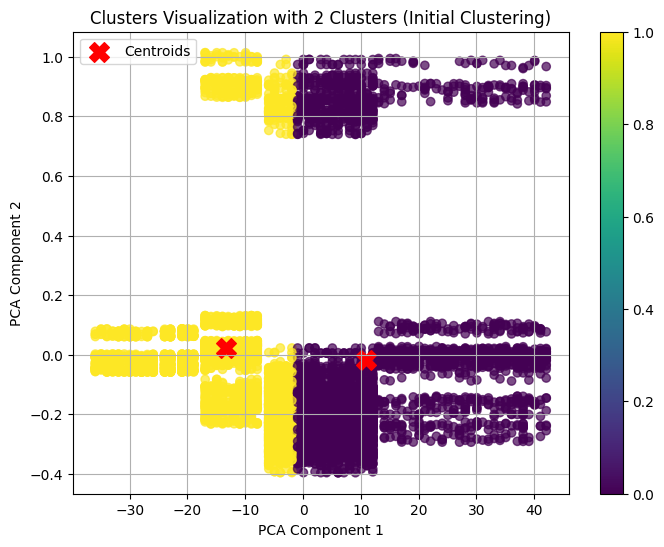

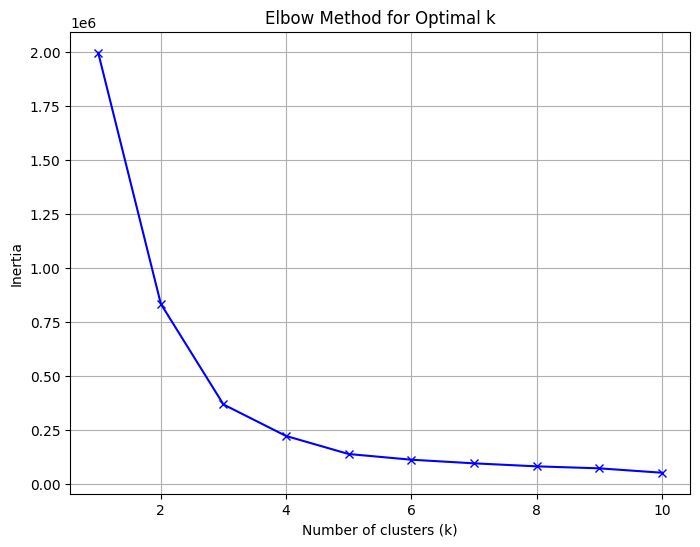

Silhouette Score for 4 clusters: 0.527
Davies-Bouldin Score for 4 clusters: 0.550
Calinski-Harabasz Score for 4 clusters: 21189.501


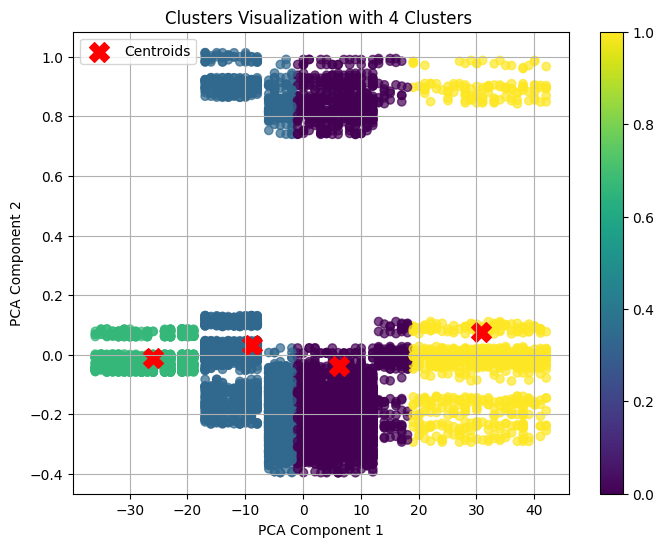

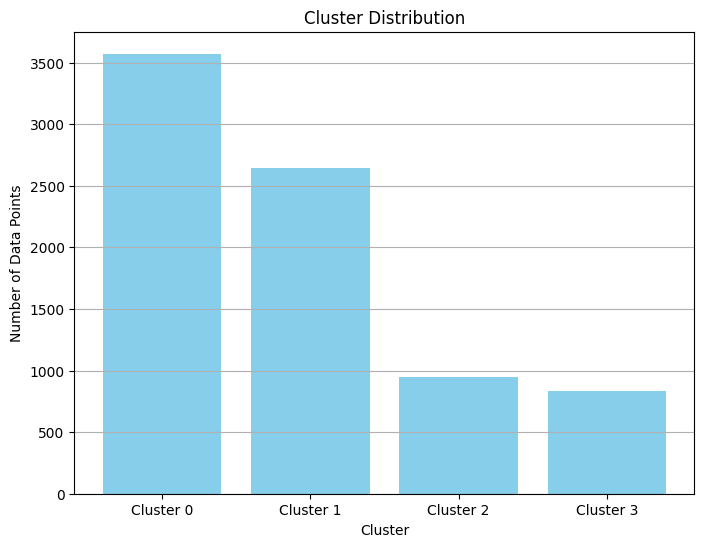

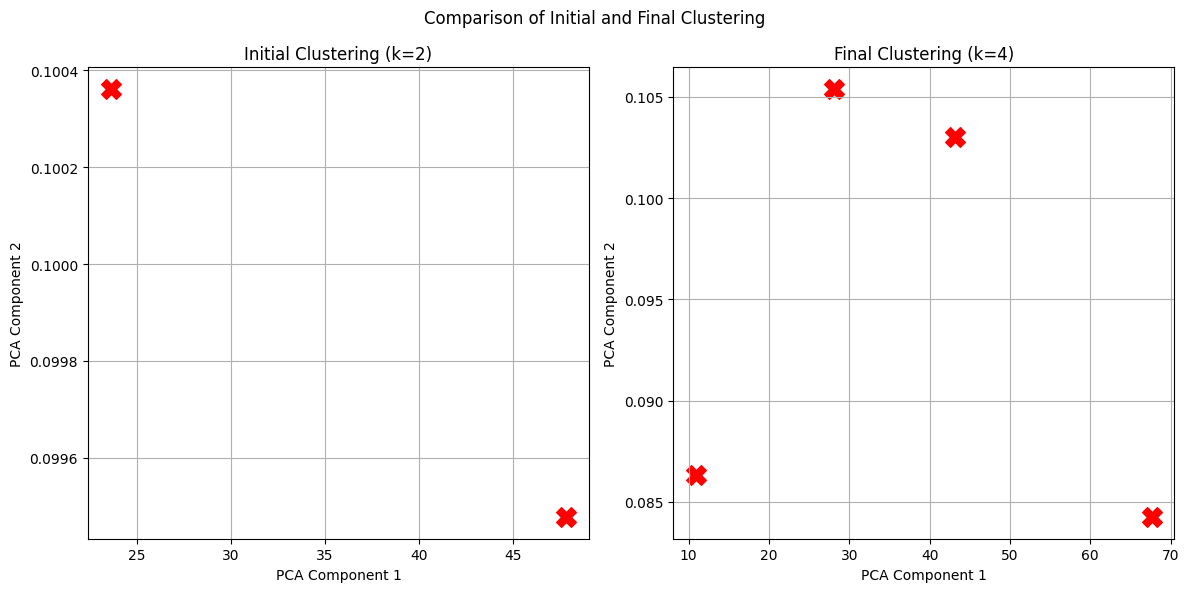

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('expanded_social_media_user_data.csv')

# Step 1: Data Preprocessing - One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)

# Encode 'location', 'content_liked', 'interest' columns
encoded_features = encoder.fit_transform(df[['location', 'content_liked', 'interest']])

# Combine the encoded features with the numerical 'age' column
processed_features = np.hstack((df[['age']].values, encoded_features))

# Step 2: Elbow Method to find optimal number of clusters
def plot_elbow_method(processed_features):
    inertia_list = []
    K = range(1, 11)  # Try from 1 to 10 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(processed_features)
        inertia_list.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia_list, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

# Step 3: Apply K-Means and Evaluate
def evaluate_and_visualize_clusters(processed_features, n_clusters, title_suffix=''):
    # Apply KMeans with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(processed_features)

    # Get the cluster labels
    labels = kmeans.labels_

    # Compute clustering evaluation metrics
    silhouette_avg = silhouette_score(processed_features, labels)
    db_score = davies_bouldin_score(processed_features, labels)
    ch_score = calinski_harabasz_score(processed_features, labels)

    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
    print(f'Davies-Bouldin Score for {n_clusters} clusters: {db_score:.3f}')
    print(f'Calinski-Harabasz Score for {n_clusters} clusters: {ch_score:.3f}')

    # Reduce to 2D using PCA for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(processed_features)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.7)

    # Plot the centroids
    centroids = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

    plt.title(f'Clusters Visualization with {n_clusters} Clusters {title_suffix}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.legend()
    plt.grid(True)
    plt.show()

    return kmeans, labels

# Step 4: Visualizing Cluster Distribution
def plot_cluster_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(8, 6))
    plt.bar(unique, counts, tick_label=[f'Cluster {i}' for i in unique], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Data Points')
    plt.title('Cluster Distribution')
    plt.grid(axis='y')
    plt.show()

# Step 5: Initial clustering with k=2 for comparison
initial_k = 2
initial_kmeans, initial_labels = evaluate_and_visualize_clusters(processed_features, initial_k, title_suffix='(Initial Clustering)')

# Step 2: Plot Elbow Method to determine optimal number of clusters
plot_elbow_method(processed_features)

# Step 3: After analyzing the Elbow Method, assume optimal k = 4
final_k = 4
final_kmeans, final_labels = evaluate_and_visualize_clusters(processed_features, final_k)

# Step 4: Plot cluster distribution for the final model
plot_cluster_distribution(final_labels)

# Step 6: Compare Initial and Final Clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(initial_kmeans.cluster_centers_[:, 0], initial_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Initial Clustering (k={initial_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Final Clustering (k={final_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

plt.suptitle('Comparison of Initial and Final Clustering')
plt.tight_layout()
plt.show()
